## Install the libraries

In [1]:
%pip install seaborn
%pip install plotly

## Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


## Exploration

In [3]:
# Read data from 4 CSV files
FPT = 'StockData/FPT.csv'
MSN = 'StockData/MSN.csv'
PNJ = 'StockData/PNJ.csv'
VIC = 'StockData/VIC.csv'

df1 = pd.read_csv(FPT)
df2 = pd.read_csv(MSN)
df3 = pd.read_csv(PNJ)
df4 = pd.read_csv(VIC)

# Concatenate the dataframes
df = pd.concat([df1, df2, df3, df4], ignore_index=True)


In [4]:
df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [5]:
df.tail()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
459330,VIC,12/22/2020 14:22,105.8,105.8,105.7,105.7,1870,0
459331,VIC,12/22/2020 14:23,105.7,105.7,105.7,105.7,2510,0
459332,VIC,12/22/2020 14:24,105.7,105.7,105.7,105.7,3620,0
459333,VIC,12/22/2020 14:25,105.7,105.7,105.7,105.7,100,0
459334,VIC,12/22/2020 14:46,105.7,105.7,105.7,105.7,90,0


In [6]:
df1=df.reset_index()['Close']

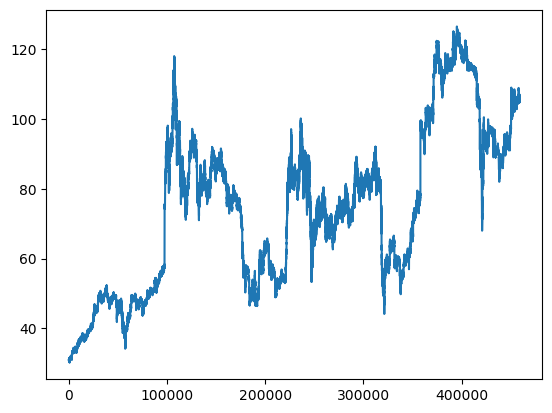

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

## Formula price volatility

In [8]:
# Calculate stock price volatility
# Use shift to get stock price N (minutes or hours or days) later
N = 1  # Change the value of N depending on the time interval you are interested in
df['BienDongGia'] = df.groupby('Ticker')['Close'].shift(-N) - df['Close']

# Remove rows with NaN 
df.dropna(inplace=True)

## Split the data into training and testing sets

In [9]:
# Split the data into training and testing sets
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest']
X = df[features]
y = df['BienDongGia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Build a model to predict stock price volatility

In [10]:

model = RandomForestRegressor(n_estimators=20, random_state=12)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=12)

## Model Optimization

## Evaluate the model on the test set

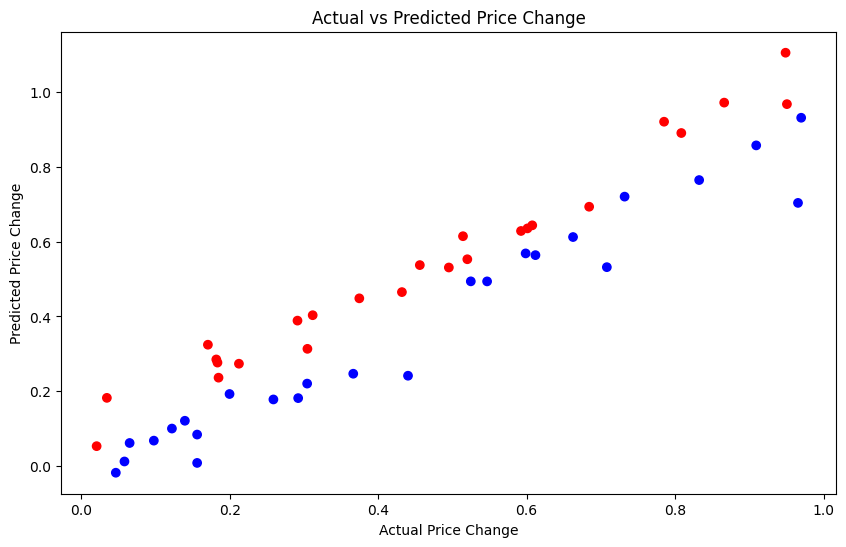

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are your actual and predicted values
# Generate some example data for demonstration
np.random.seed(42)
y_test = np.random.rand(50)
y_pred = y_test + np.random.normal(0, 0.1, 50)

# Create a scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c=['blue' if actual > predicted else 'red' for actual, predicted in zip(y_test, y_pred)])
plt.xlabel('Actual Price Change')
plt.ylabel('Predicted Price Change')
plt.title('Actual vs Predicted Price Change')
plt.show()

In [12]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')

<class 'ValueError'>: Found input variables with inconsistent numbers of samples: [50, 91867]

## Visualization 

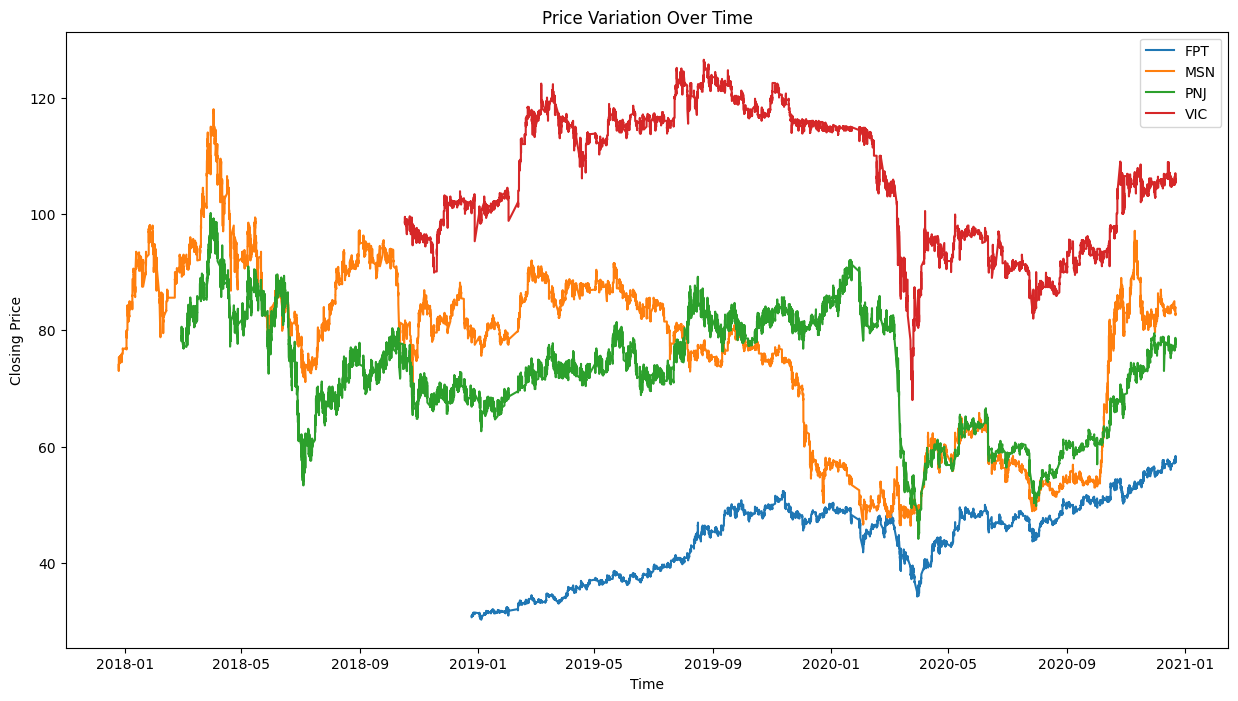

In [13]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Plotting
plt.figure(figsize=(15, 8))
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker]
    plt.plot(ticker_data['Date/Time'], ticker_data['Close'], label=ticker)

plt.title('Price Variation Over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


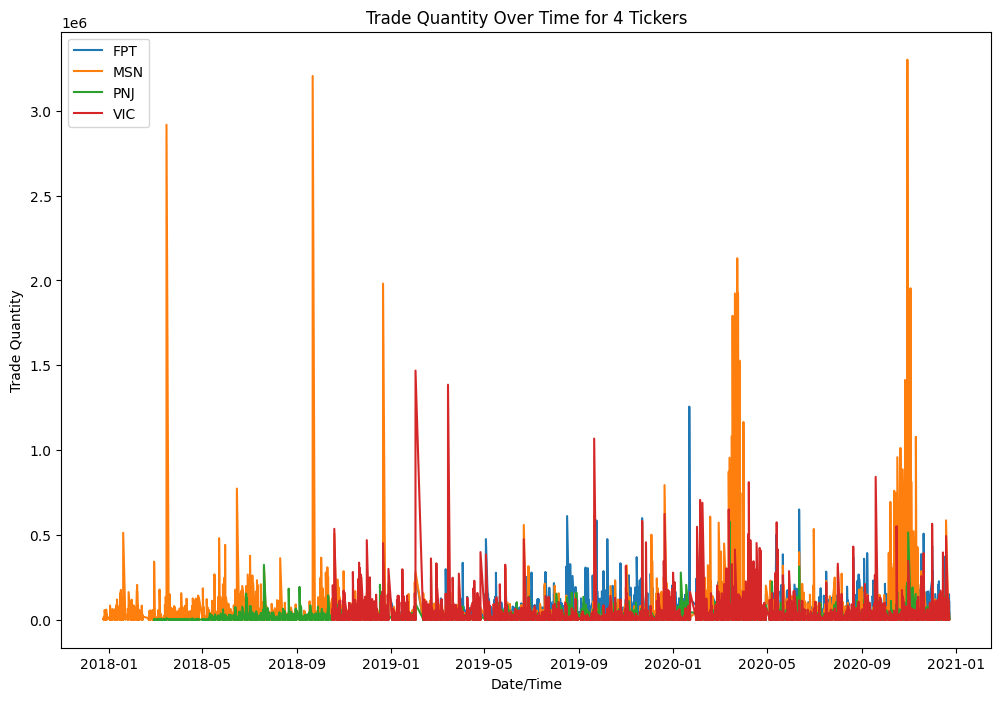

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Vẽ biểu đồ trade quantity cho 4 mã cổ phiếu
plt.figure(figsize=(12, 8))

# Lặp qua từng ticker để vẽ biểu đồ
tickers = df['Ticker'].unique()
for ticker in tickers:
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date/Time'], subset['Volume'], label=ticker)

# Đặt các nhãn và tiêu đề
plt.xlabel('Date/Time')
plt.ylabel('Trade Quantity')
plt.title('Trade Quantity Over Time for 4 Tickers')
plt.legend()
plt.show()

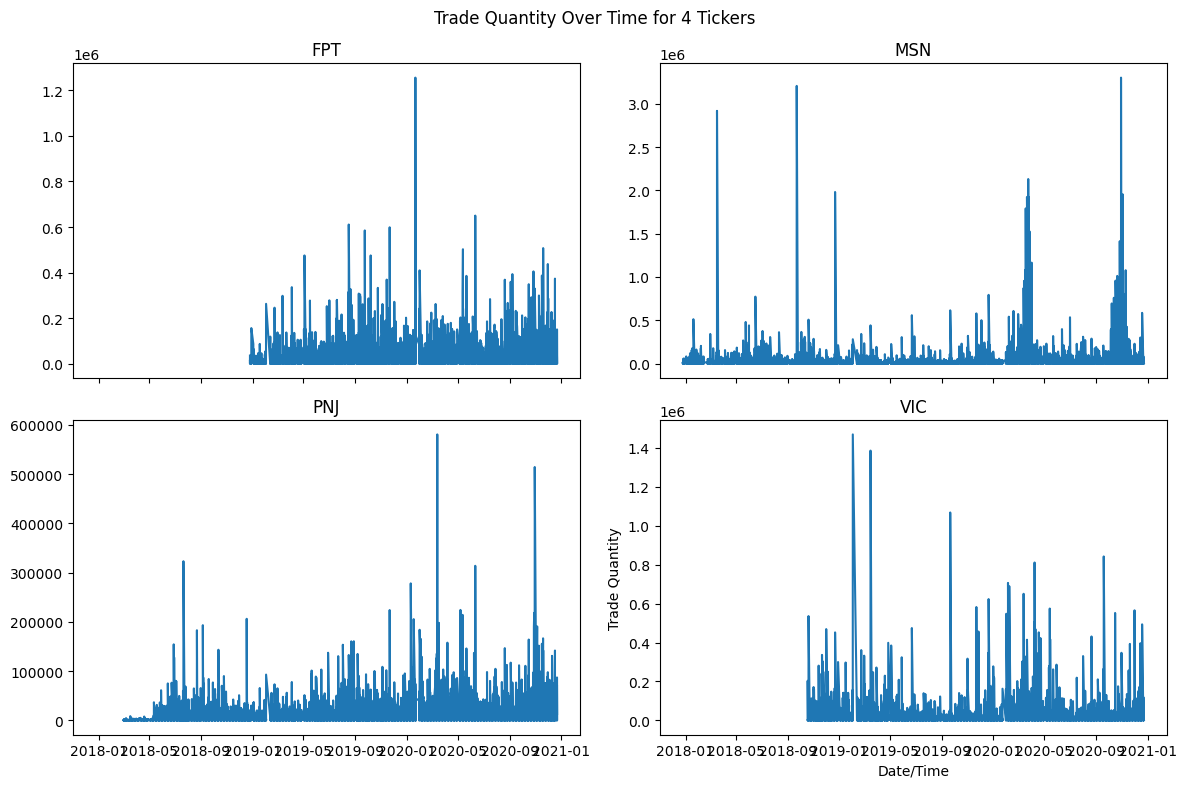

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo một figure với 4 subplots (2 dòng, 2 cột)
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

# Lặp qua từng ticker để vẽ biểu đồ
tickers = df['Ticker'].unique()
for i, ticker in enumerate(tickers):
    subset = df[df['Ticker'] == ticker]
    
    # Xác định vị trí của subplot trong grid
    row = i // 2
    col = i % 2
    
    # Vẽ biểu đồ trong subplot tương ứng
    axs[row, col].plot(subset['Date/Time'], subset['Volume'], label=ticker)
    axs[row, col].set_title(ticker)

# Đặt các nhãn và tiêu đề chung cho toàn bộ figure
plt.xlabel('Date/Time')
plt.ylabel('Trade Quantity')
fig.suptitle('Trade Quantity Over Time for 4 Tickers')

# Đảm bảo rằng không có chồng chéo giữa các subplot
plt.tight_layout()

# Hiển thị figure
plt.show()